### Week 3 B
### Name: Jay Zhang

To solve the question: "What's the relationship between the TP53 gene and Esophageal Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Esophageal_Cancer_(ESCA)/TCGA.ESCA.sampleMap_ESCA_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Esophageal_Cancer_(ESCA)/TCGA.ESCA.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [2]:
# Display clinical dataset
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,...,_GENOMIC_ID_TCGA_ESCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_ESCA_exp_HiSeq,_GENOMIC_ID_TCGA_ESCA_miRNA_HiSeq,_GENOMIC_ID_TCGA_ESCA_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_ESCA_gistic2,_GENOMIC_ID_TCGA_ESCA_gistic2thd,_GENOMIC_ID_TCGA_ESCA_mutation_broad_gene,_GENOMIC_ID_TCGA_ESCA_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_ESCA_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_ESCA_PDMRNAseqCNV
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,MSI-L,TCGA-2H-A9GF-01,TCGA-2H-A9GF,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,67,...,2666431c-515b-4088-a448-baf7c52106d8,TCGA-2H-A9GF-01A-11R-A37I-31,TCGA-2H-A9GF-01,TCGA-2H-A9GF-01A-11D-A37C-09,TCGA-2H-A9GF-01A-11D-A37B-01,TCGA-2H-A9GF-01A-11D-A37B-01,TCGA-2H-A9GF-01A-11D-A37C-09,2666431c-515b-4088-a448-baf7c52106d8,TCGA-2H-A9GF-01A-11D-A37C-09,TCGA-2H-A9GF-01
TCGA-2H-A9GG-01,MSI-L,TCGA-2H-A9GG-01,TCGA-2H-A9GG,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,66,...,9fcd3933-2651-4c64-8c77-3dac4d8ea595,TCGA-2H-A9GG-01A-11R-A37I-31,TCGA-2H-A9GG-01,NaN,NaN,NaN,NaN,9fcd3933-2651-4c64-8c77-3dac4d8ea595,NaN,NaN
TCGA-2H-A9GH-01,MSS,TCGA-2H-A9GH-01,TCGA-2H-A9GH,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,44,...,775bb1a6-0463-4e78-bc3f-596e3a5eb38f,TCGA-2H-A9GH-01A-11R-A37I-31,TCGA-2H-A9GH-01,TCGA-2H-A9GH-01A-11D-A37C-09,TCGA-2H-A9GH-01A-11D-A37B-01,TCGA-2H-A9GH-01A-11D-A37B-01,TCGA-2H-A9GH-01A-11D-A37C-09,775bb1a6-0463-4e78-bc3f-596e3a5eb38f,TCGA-2H-A9GH-01A-11D-A37C-09,TCGA-2H-A9GH-01
TCGA-2H-A9GI-01,MSS,TCGA-2H-A9GI-01,TCGA-2H-A9GI,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,68,...,3e9a405f-cb27-4773-b501-57a2eaf833d4,TCGA-2H-A9GI-01A-11R-A37I-31,TCGA-2H-A9GI-01,TCGA-2H-A9GI-01A-11D-A37C-09,TCGA-2H-A9GI-01A-11D-A37B-01,TCGA-2H-A9GI-01A-11D-A37B-01,TCGA-2H-A9GI-01A-11D-A37C-09,3e9a405f-cb27-4773-b501-57a2eaf833d4,TCGA-2H-A9GI-01A-11D-A37C-09,TCGA-2H-A9GI-01
TCGA-2H-A9GJ-01,MSS,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,57,...,67bda296-5e65-45a9-962e-a99f51a12e14,TCGA-2H-A9GJ-01A-11R-A37I-31,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ-01A-11D-A37C-09,TCGA-2H-A9GJ-01A-11D-A37B-01,TCGA-2H-A9GJ-01A-11D-A37B-01,TCGA-2H-A9GJ-01A-11D-A37C-09,67bda296-5e65-45a9-962e-a99f51a12e14,TCGA-2H-A9GJ-01A-11D-A37C-09,TCGA-2H-A9GJ-01


In [3]:
# Display gene dataset
gene_data.head()

,TCGA-L5-A4OF-01,TCGA-LN-A49R-01,TCGA-Z6-A9VB-01,TCGA-L5-A8NF-01,TCGA-2H-A9GG-01,TCGA-IG-A3QL-01,TCGA-VR-AA7B-01,TCGA-2H-A9GN-01,TCGA-L7-A6VZ-01,TCGA-L5-A4OF-11,...,TCGA-L5-A4ON-01,TCGA-LN-A4A1-01,TCGA-R6-A8WC-01,TCGA-L5-A4OR-11,TCGA-L5-A88Z-01,TCGA-JY-A6FG-01,TCGA-L5-A4OM-01,TCGA-Z6-A8JE-01,TCGA-L5-A4OQ-01,TCGA-M9-A5M8-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.346108,-0.900892,-0.284892,0.743108,2.075308,-2.573692,0.204308,2.126808,-0.005492,0.108108,...,0.474308,0.026308,1.397708,0.204708,-1.251092,0.742408,-0.346092,-0.051892,1.588408,1.040308
HIF3A,6.799274,-1.649026,-2.676126,1.323974,1.644074,4.542674,1.987874,-0.526626,0.983874,3.616474,...,0.793874,-2.759026,1.469874,4.360974,-2.890026,-3.941826,1.259274,5.328074,4.529274,-2.615326
RNF17,8.020965,0.335165,0.207865,-0.531035,-0.531035,0.316065,-0.197535,-0.531035,-0.200335,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.136835,-0.531035,-0.149235,0.277265,-0.531035,-0.531035
RNF10,-0.052472,-0.162772,-0.103472,0.199728,-0.143172,-0.542672,-0.081372,0.002928,0.715428,0.504128,...,0.193828,-0.111372,0.298328,0.914828,0.218628,0.984628,0.005928,-0.025472,-0.032372,0.095328
RNF11,-0.727578,0.226422,0.045122,0.040222,-0.389978,-0.189378,0.569622,0.145622,-0.591578,0.056922,...,0.014822,0.940222,-1.251278,0.592822,-0.431478,0.851022,0.293222,0.706922,-0.397778,0.120722


In [4]:
# Set Basic info
gene_fullname = 'TP53 gene'
gene = 'tp53'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Esophageal Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 120 features, and the gene dataset includes 20530 genes


In [5]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,MSI-L,TCGA-2H-A9GF-01,TCGA-2H-A9GF,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,67,...,0.646322,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812
TCGA-2H-A9GG-01,MSI-L,TCGA-2H-A9GG-01,TCGA-2H-A9GG,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,66,...,-0.748878,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812
TCGA-2H-A9GH-01,MSS,TCGA-2H-A9GH-01,TCGA-2H-A9GH,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,44,...,-0.301178,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788
TCGA-2H-A9GI-01,MSS,TCGA-2H-A9GI-01,TCGA-2H-A9GI,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,68,...,-0.748878,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788
TCGA-2H-A9GJ-01,MSS,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,57,...,1.729622,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188


In [6]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,-24487,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,0.646322,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812
TCGA-2H-A9GG-01,-24328,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-0.748878,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812
TCGA-2H-A9GH-01,-16197,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-0.301178,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788
TCGA-2H-A9GI-01,-25097,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-0.748878,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788
TCGA-2H-A9GJ-01,-21180,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,1.729622,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188


In [7]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Esophageal Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,-24487,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812,1
TCGA-2H-A9GG-01,-24328,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812,1
TCGA-2H-A9GH-01,-16197,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788,1
TCGA-2H-A9GI-01,-25097,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788,1
TCGA-2H-A9GJ-01,-21180,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188,1


In [8]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

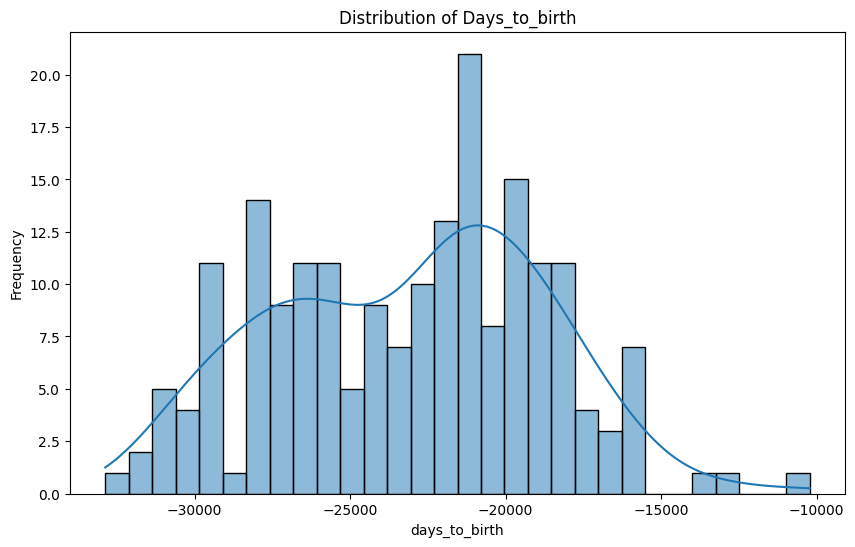

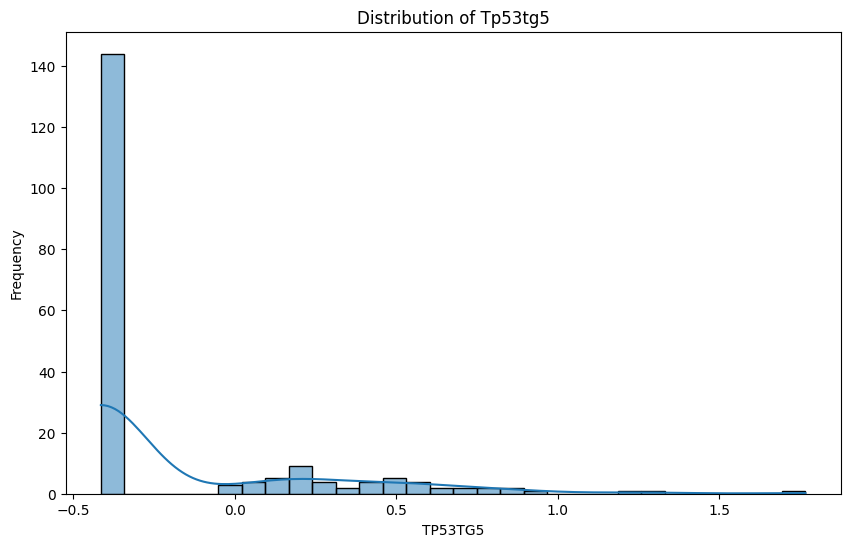

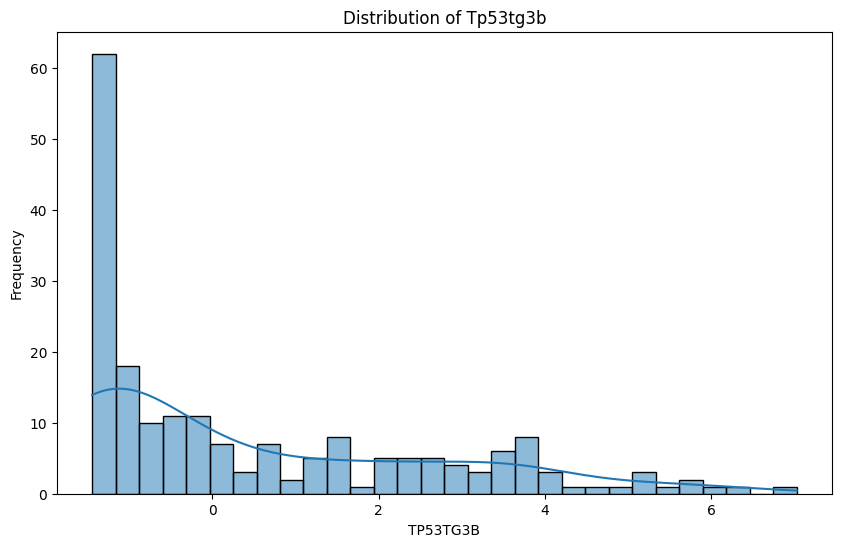

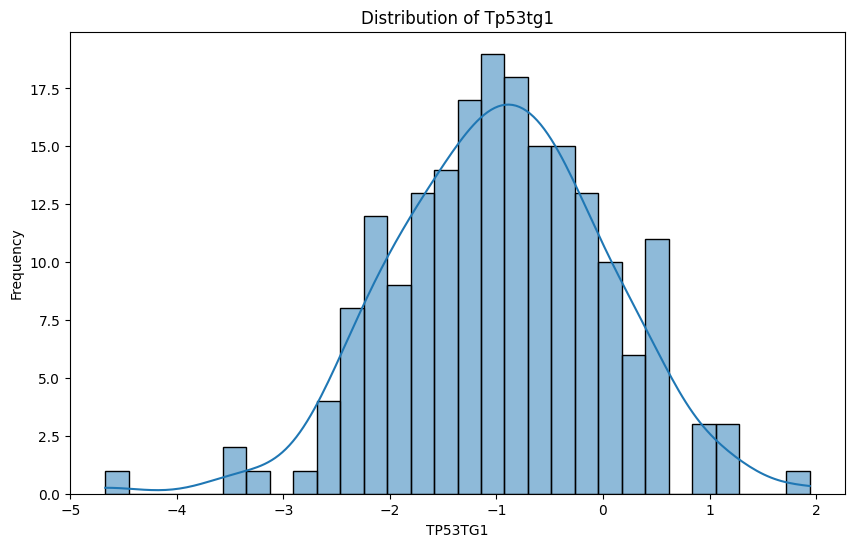

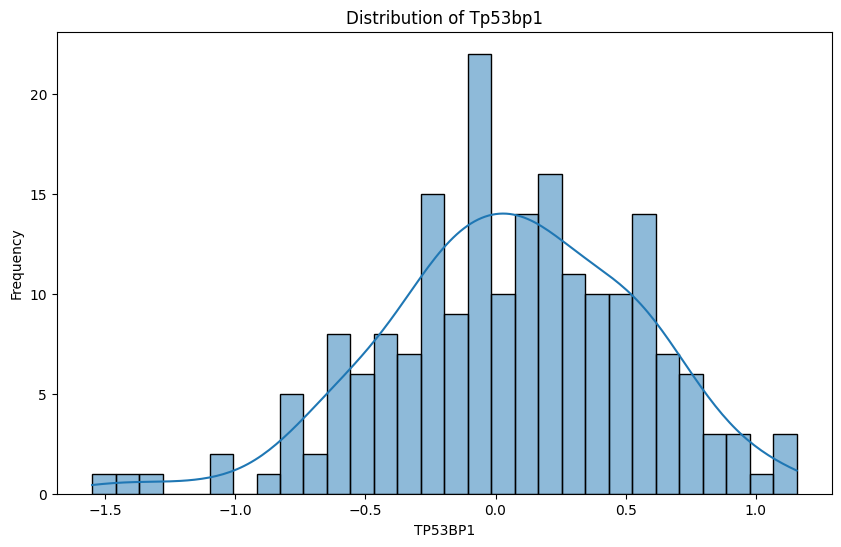

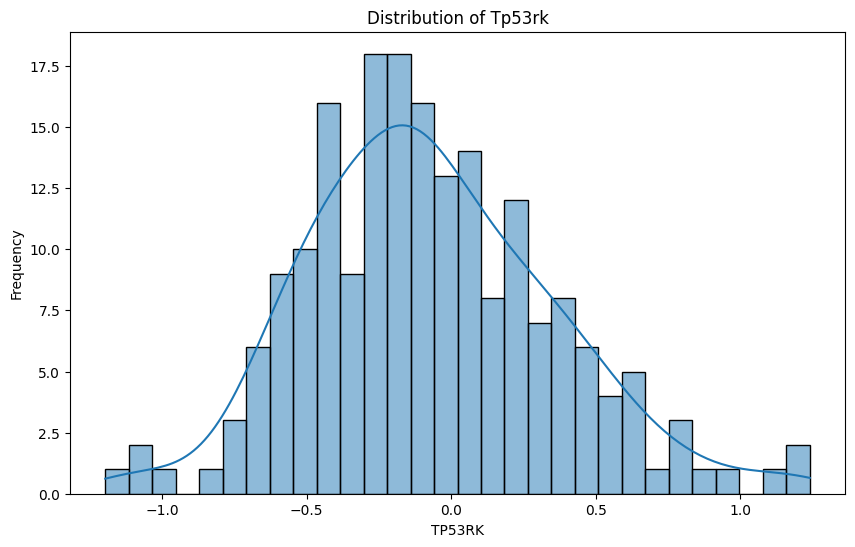

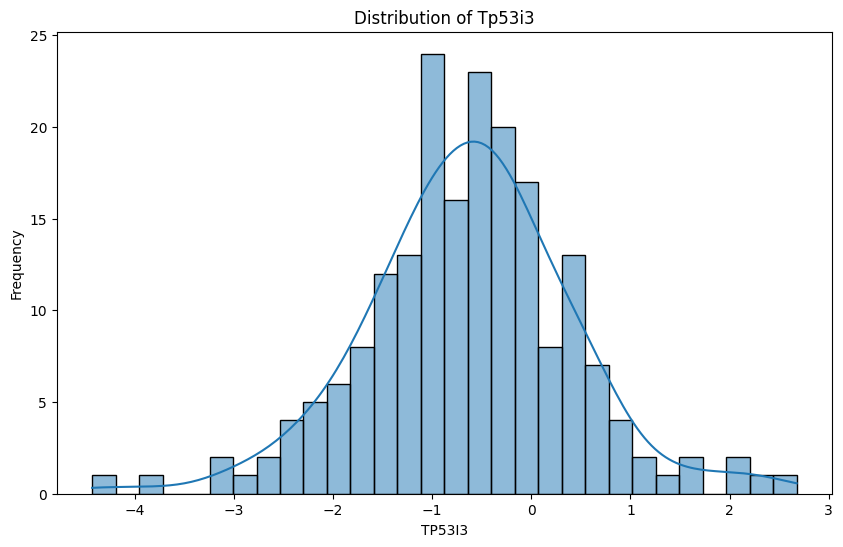

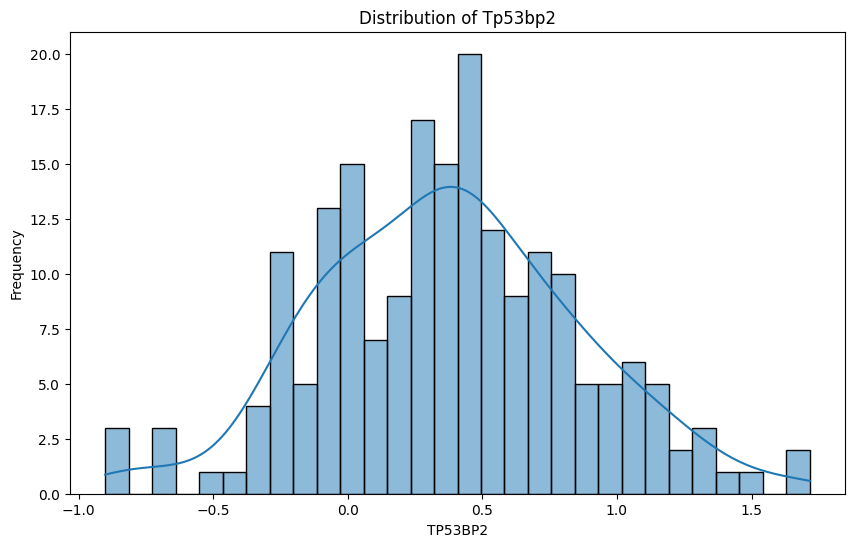

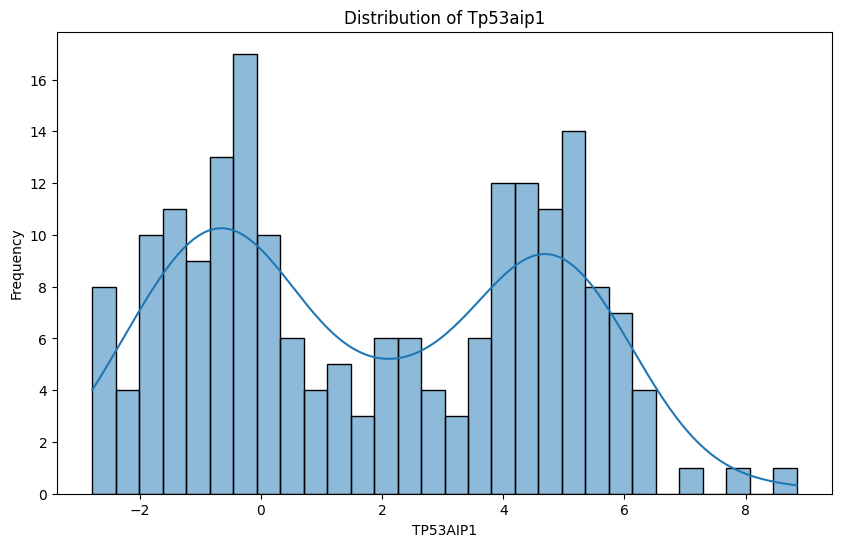

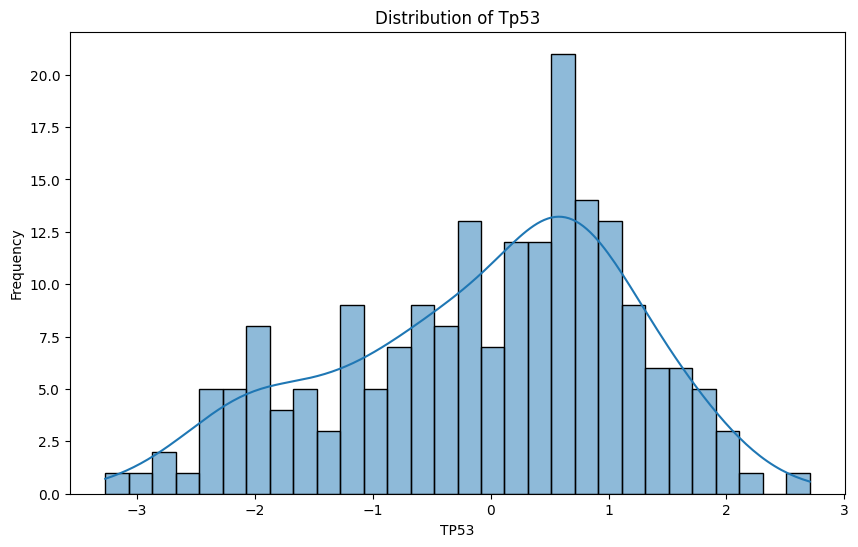

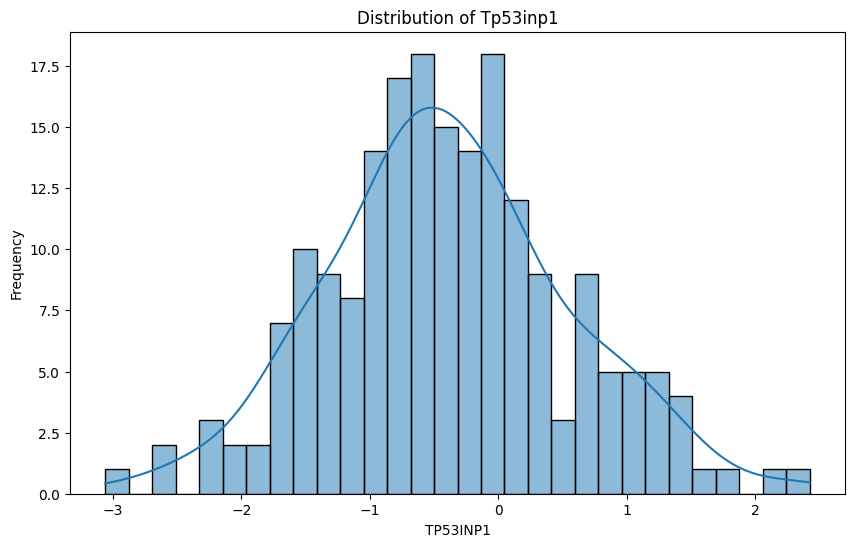

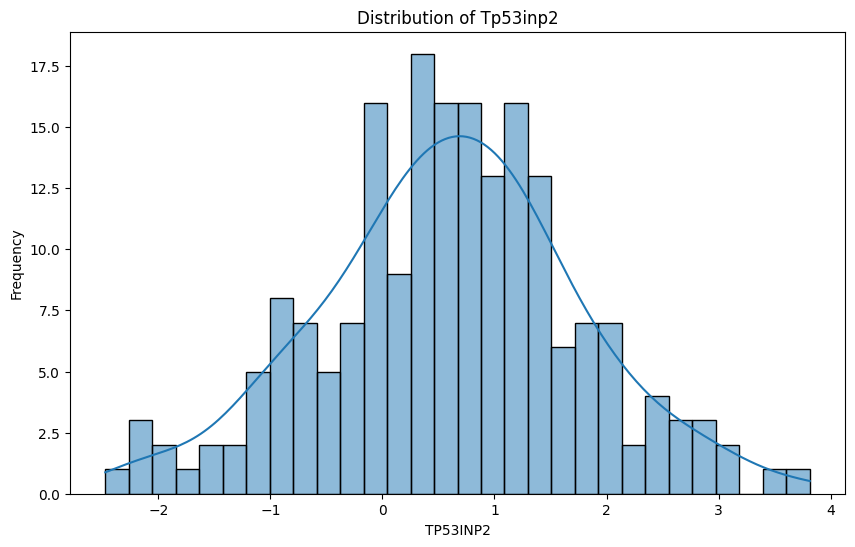

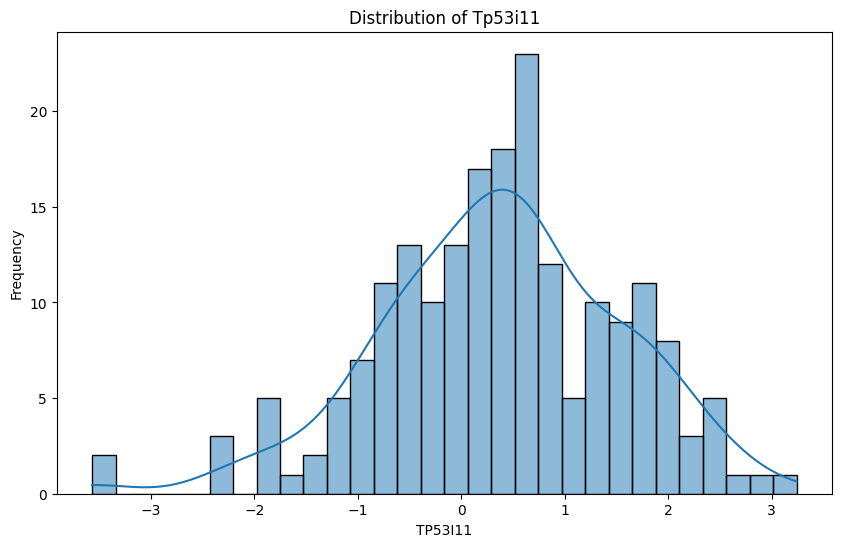

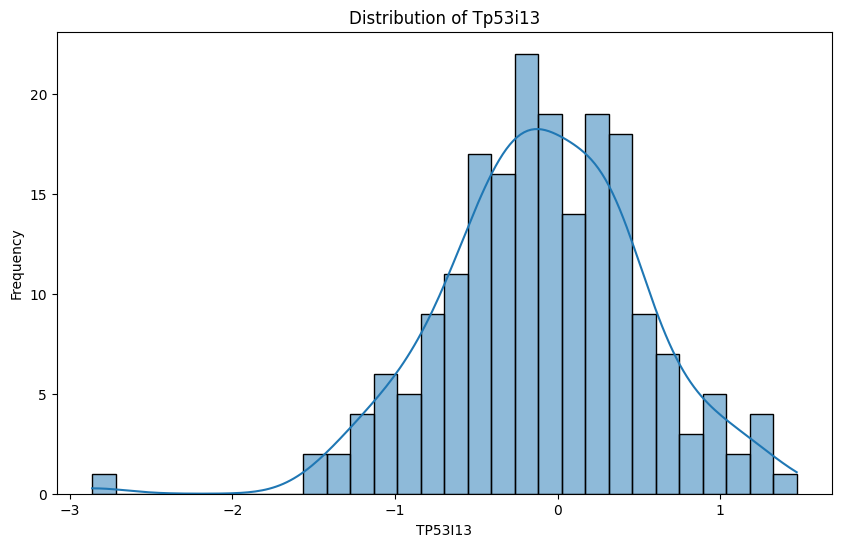

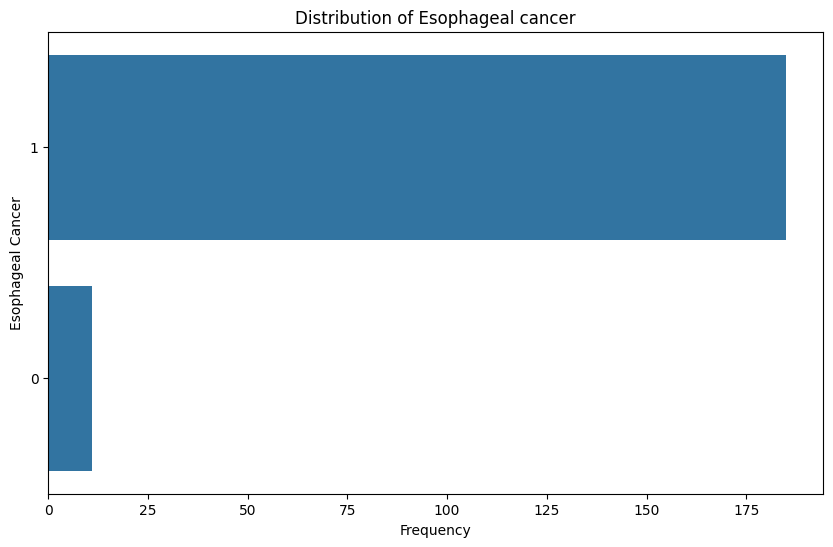

In [9]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [10]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Esophageal Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,67,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812,1
TCGA-2H-A9GG-01,66,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812,1
TCGA-2H-A9GH-01,44,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788,1
TCGA-2H-A9GI-01,68,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788,1
TCGA-2H-A9GJ-01,57,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188,1


### 3. Do regression & Cross Validation

In [11]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1778/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.8570677186061803


In [12]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For tp53:
TP53TG5: Coefficient = 0.018033860106997823, p-value = 0.08593121956294705
TP53TG3B: Coefficient = 0.019677057367153236, p-value = 0.2546588985399444
TP53TG1: Coefficient = 0.0038616476285061553, p-value = 0.8301488602976425
TP53BP1: Coefficient = 0.029451345262400702, p-value = 0.10385142835441677
TP53RK: Coefficient = -0.012446821460804822, p-value = 0.43749633608162786
TP53I3: Coefficient = -0.0034448062696267475, p-value = 0.8514243047253245
TP53BP2: Coefficient = -0.0010164064248864256, p-value = 0.9492855088753354
TP53AIP1: Coefficient = -0.0032935747218403866, p-value = 0.9004804664261237
TP53: Coefficient = 0.012746615190613117, p-value = 0.27379771441637185
TP53INP1: Coefficient = 0.012915152979662323, p-value = 0.4789276429276371
TP53INP2: Coefficient = 0.030047799093690854, p-value = 0.11195276444684937
TP53I11: Coefficient = -0.0074276525293710295, p-value = 0.663524022303227
TP53I13: Coefficient = -0.008258800085567595, p-value = 0.6204192164

### 4. Discussion

In [13]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 gene and Esophageal Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.




In [14]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: TP53TG5
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG3B
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53RK
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53I3
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP2
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53AIP1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53INP1
Coefficient i

In [16]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: TP53TG5
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG5 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53TG3B
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG3B gene and Esophageal Cancer when considering the influence of age.

Variable: TP53TG1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG1 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53BP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53BP1 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53RK
Conclusion: H0 is not rejected: There is ins